In [2]:
from sklearn.datasets import load_iris

irisData = load_iris()
X, y = irisData["data"], irisData["target"]

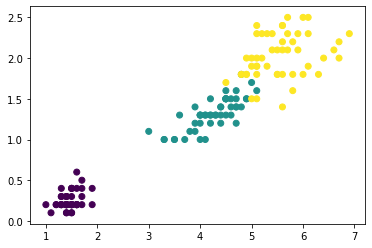

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 2],X[:, 3],c=y)

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X[:, 2:])

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [8]:
pca.components_

array([[0.92177769, 0.38771882]])

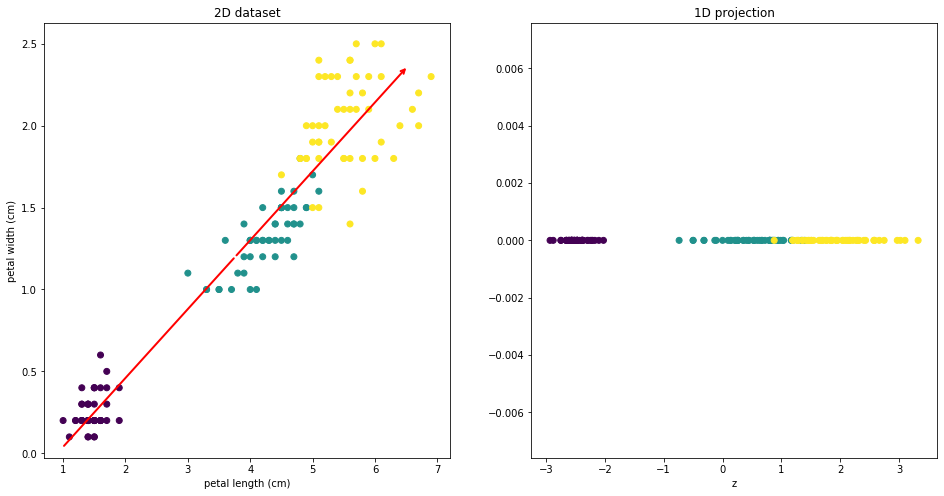

In [80]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121)
plt.scatter(X[:, 2],X[:, 3],c=y)
plt.annotate('',pca.mean_,pca.mean_-3*pca.components_[0],arrowprops=dict(arrowstyle='-',linewidth=2,color='red'))
plt.annotate('',pca.mean_,pca.mean_+3*pca.components_[0],arrowprops=dict(arrowstyle='<-',linewidth=2,color='red'))
plt.title('2D dataset')
plt.xlabel(irisData['feature_names'][2])
plt.ylabel(irisData['feature_names'][3])
ax = fig.add_subplot(122)
# z = pca.components_[0,0]*X[:, 2] + pca.components_[0,1]*X[:, 3]
plt.scatter(pca.transform(X[:, 2:]),np.zeros(len(n)),c=y)#z,np.zeros(len(n)),c=y)
plt.title('1D projection')
plt.xlabel('z')
# plt.savefig('projection2D1D.png',bbox_inches='tight')
plt.show()

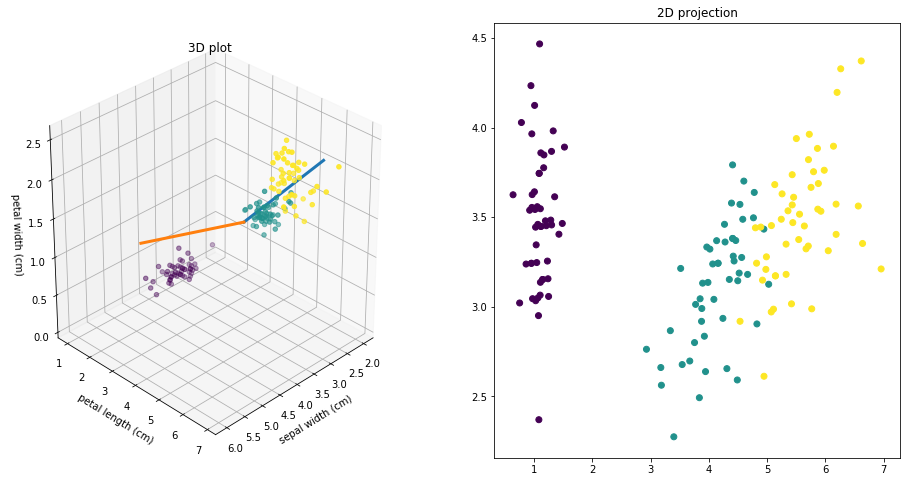

In [88]:
from mpl_toolkits.mplot3d import Axes3D
pca2 = PCA(n_components=2)
pca2.fit(X[:, 1:])
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 1],X[:, 2],X[:, 3],c=y)
comp1 = pca2.mean_+3*pca2.components_[0]
comp2 = pca2.mean_+3*pca2.components_[1]
ax.plot(xs=[pca2.mean_[0],comp1[0]],ys=[pca2.mean_[1],comp1[1]],zs=[pca2.mean_[2],comp1[2]],linewidth=3)
ax.plot(xs=[pca2.mean_[0],comp2[0]],ys=[pca2.mean_[1],comp2[1]],zs=[pca2.mean_[2],comp2[2]],linewidth=3)
plt.xlabel(irisData['feature_names'][1])
plt.ylabel(irisData['feature_names'][2])
ax.set_zlabel(irisData['feature_names'][3])
ax.view_init(30,45)
plt.title('3D plot')
ax = fig.add_subplot(122)
z1 = pca2.components_[0,0]*X[:, 1] +pca2.components_[0,1]*X[:, 2] + pca2.components_[0,2]*X[:, 3]
z2 = pca2.components_[1,0]*X[:, 1] +pca2.components_[1,1]*X[:, 2] + pca2.components_[1,2]*X[:, 3]
# plt.scatter(x=pca2.transform(X[:,1:])[:,0],y=pca2.transform(X[:,1:])[:,1],c=y)#z1,z2,c=y)
plt.title('2D projection')
plt.scatter(z1,z2,c=y)
plt.savefig('projection3D2D.png',bbox_inches='tight')
plt.show()

Plot image of projecting 2D -> 1D (see above), 3D -> 2D (hyperplane), and 3D -> 1D (data basically randomly spread about a line in 3D space) to show that it's not always just 1 dimension down

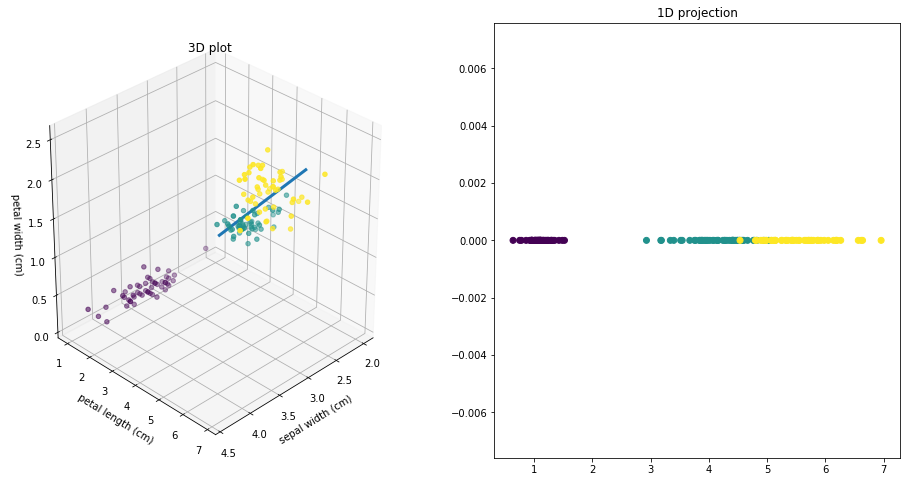

In [95]:
from mpl_toolkits.mplot3d import Axes3D
pca3 = PCA(n_components=1)
pca3.fit(X[:, 1:])
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 1],X[:, 2],X[:, 3],c=y)
comp1 = pca3.mean_+3*pca3.components_[0]
ax.plot(xs=[pca3.mean_[0],comp1[0]],ys=[pca3.mean_[1],comp1[1]],zs=[pca3.mean_[2],comp1[2]],linewidth=3)
plt.xlabel(irisData['feature_names'][1])
plt.ylabel(irisData['feature_names'][2])
ax.set_zlabel(irisData['feature_names'][3])
ax.view_init(30,45)
plt.title('3D plot')
ax = fig.add_subplot(122)
z1 = pca3.components_[0,0]*X[:, 1] +pca3.components_[0,1]*X[:, 2] + pca3.components_[0,2]*X[:, 3]
# plt.scatter(x=pca2.transform(X[:,1:])[:,0],y=pca2.transform(X[:,1:])[:,1],c=y)#z1,z2,c=y)
plt.title('1D projection')
plt.scatter(z1,y=np.zeros(len(z1)),c=y)
plt.savefig('projection3D1D.png',bbox_inches='tight')
plt.show()

In [92]:
pca3.components_[0]

array([-0.09961563,  0.91735823,  0.38539668])